# Reading the Dataset

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api

In [55]:
df = pd.read_csv('C:/Users/USER/Desktop/Projects/Datasets/airpassengers/AirPassengers.csv')

In [56]:
df.shape

(144, 2)

Thus, there are 144 observations.

In [57]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [58]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [59]:
#Checking for missing values:

df[df.isnull().any(axis=1)].head()

,Month,#Passengers


Clearly, there are zero missing values in the dataset.

# Sorting the Data

In [60]:
#Changing column name:

df.columns=['Month', 'Passengers']
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [61]:
#Converting Month into Date-time:

df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [62]:
#Dropping the index column, and indexing as per the Month:

df.set_index('Month', inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [63]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


# Visualizing the Data

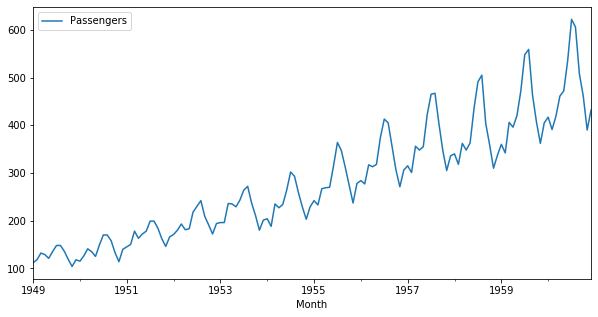

In [64]:
df.plot(figsize=(10,5))

Clearly, the sales data seems to be seasonal (and non-stationary) in nature, with sales dipping at the end of each year.

In [65]:
#Testing for stationarity using the Augmented Dickey-Fuller test:

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Passengers'])

In [66]:
#We set the null hypothesis as:
#H0: The series is non-stationary
#H1: The series is stationary


def adfuller_test(Passengers):
    result=adfuller(Passengers)
    labels = ['ADF Test Statistic', 'p-value', '#Lags used', 'Number of observations used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    

In [67]:
adfuller_test(df['Passengers'])

ADF Test Statistic : 0.8153688792060423
p-value : 0.9918802434376409
#Lags used : 13
Number of observations used : 130


Clearly, the p-value > 0.05, and thus we fail to reject H0, as there is insufficient evidence against H0. Thus, we conclude that the given series is non-stationary.

# Differencing

In [68]:
#Differencing the data with previous lag to make it stationary:

df['Passengers First Difference'] = df['Passengers'] - df['Passengers'].shift(1)

In [69]:
#Differencing the data to accomodate seasonal component:

df['Seasonal First Difference'] = df['Passengers'] - df['Passengers'].shift(12)

In [70]:
df.head(14)

,Passengers,Passengers First Difference,Seasonal First Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN


In [71]:
#Testing for Seasonal First Difference using ADF test:

adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.3830207264924805
p-value : 0.011551493085514982
#Lags used : 1
Number of observations used : 130


Clearly, the p-value < 0.05, and thus we reject H0, as there is sufficient evidence against H0. Thus, we conclude that the given 'Seasonal First Difference' series is stationary.

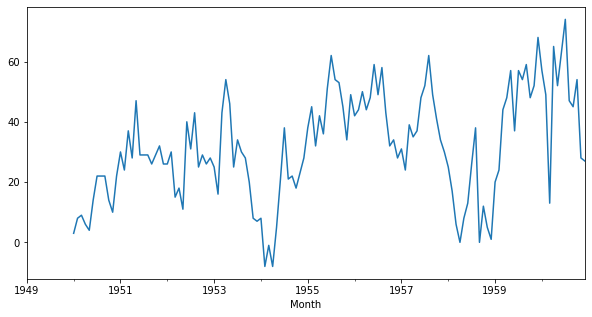

In [72]:
df['Seasonal First Difference'].plot(figsize=(10,5))

# Fitting a Model:

# ARIMA Model:

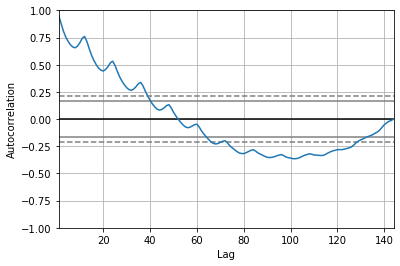

In [73]:
#plotting autocorrelation function:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Passengers'])
plt.show()

In [74]:
#Checking for optimal order (i.e., optimal p,d,q) of ARIMA(p,d,q):

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


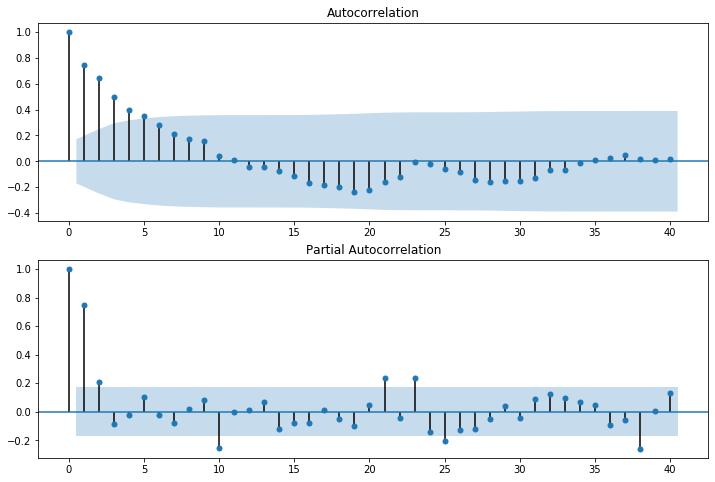

In [75]:

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

From the PACF, clearly optimal shut-off point, i.e, optimal p = 2;

From the ACF, clearly optimal q = 1

AND,

Since we shifted the 'Seasonal First Difference' curve once, d = 1.


In [76]:
from statsmodels.tsa.arima_model import ARIMA

In [77]:
model=ARIMA(df['Passengers'],order=(2,1,1))
model_fit=model.fit()

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [78]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -675.848
Method:                       css-mle   S.D. of innovations             26.881
Date:                Sat, 25 Apr 2020   AIC                           1361.696
Time:                        22:05:40   BIC                           1376.510
Sample:                    02-01-1949   HQIC                          1367.716
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6695      0.132     20.185      0.000       2.410       2.929
ar.L1.D.Passengers     1.1043      0.071     15.460      0.000       0.964       1.244
ar.L2.D.Passengers    -0.5104      0.072     -7.095      0.000      -0.651      -0.369
ma.L1.D.Passengers    -1.0000      0.029    -34.129      0.000      -1.057      -0.943
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0818           -0.8883j            1.3998           -0.1094
AR.2            1.0818           +0.8883j            1.3998            0.1094
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

Our estimated model is thus of the form:

Yt = 2.6695 + 1.1043Yt-1 - 0.5104Yt-2 -ut-1 

where, Yt = Passengers in period 't'

       Y(t-k) = Yt = Passengers in period 't-k'

        ut = White Noise term
       
with all coefficients being statistically significant.



However, we must be careful that our dataset has seasonal components. And thus we might have a better fit with SARIMAX, rather than ARIMA.

# Fitting SARIMAX model:

In [79]:
import statsmodels.api as sm

In [80]:
model1=sm.tsa.SARIMAX(df['Passengers'],order=(2,1,1),seasonal_order=(2,1,1,12))
results=model1.fit()

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


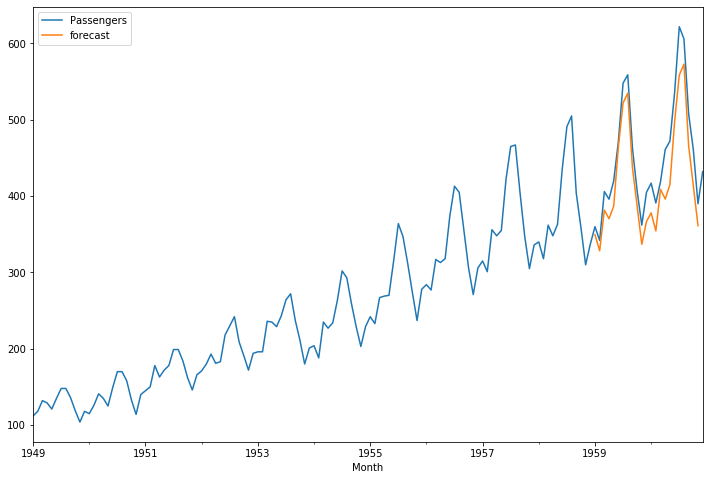

In [81]:
#Forecasting for the final 23 values:

df['forecast']=results.predict(start=120,end=142,dynamic=True)
df[['Passengers', 'forecast']].plot(figsize=(12,8))

Here, the blue line represents the actual 'Passengers' data, and the orange line represents the predicted 'Passengers' data.

In [82]:
#Forecasting for the next 2 years, i.e., the next 24 time periods:

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [83]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [84]:
#Checking for newly created monthly data:

future_dataset_df.tail()

,Passengers,Passengers First Difference,Seasonal First Difference,forecast
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [85]:
#Concatenating present data and future dataset:

future_df=pd.concat([df,future_dataset_df])

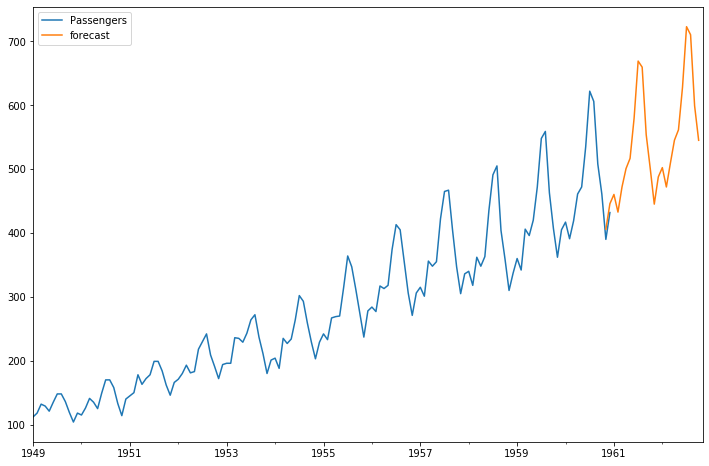

In [86]:
#Forecasting for the future data of Passengers:

future_df['forecast'] = results.predict(start = 142, end = 165, dynamic=True)
future_df[['Passengers', 'forecast']].plot(figsize=(12,8))

In [87]:
#Checking for the final 10 values:

future_df.tail(10)

,Passengers,Passengers First Difference,Seasonal First Difference,forecast
1962-02-01,NaN,NaN,NaN,472.023870
1962-03-01,NaN,NaN,NaN,509.475865
1962-04-01,NaN,NaN,NaN,545.251132
1962-05-01,NaN,NaN,NaN,561.479407
1962-06-01,NaN,NaN,NaN,628.073775
1962-07-01,NaN,NaN,NaN,722.980676
1962-08-01,NaN,NaN,NaN,710.370253
1962-09-01,NaN,NaN,NaN,599.034277
1962-10-01,NaN,NaN,NaN,545.100841
1962-11-01,NaN,NaN,NaN,NaN


# Conclusions:

1) The initial data set had 144 observations on monthly Passengers data.

2) The data set was non-stationary in nature, as indicated by the diagram, and confirmed by the Augmented Dickey-Fuller(ADF) Test. Also, from the plot, we could see the seasonal nature of the data.

3) To remove the stationary component, we took first difference. However, keeping in mind the seasonal component, we had to shift it to 12 places.

4) To find the optimal order of ARIMA(p,d,q), we plotted the Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF). From which, we concluded the order to be ARIMA(2,1,1).

5) However, ARIMA would have been a bad fit for the same seasonal factors. Thus, we incorporated the SARIMAX model.

6) Using the SARIMAX model, we forecasted the last 23 values of our dataset.

7) Also, we forecasted the future values, i.e., we forecasted the Passengers for the next 2 years using our SARIMAX model.